In [781]:
import pandas as pd
import numpy as np

In [782]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\adult\\adult.data")
test=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\adult\\adult.test")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [783]:
test.head(3)

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.


In [784]:
df.columns=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","Income"]
test.columns=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","Income"]

In [785]:
df.head(5)    

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [786]:
df[["education_num","education"]].head(3)

,education_num,education
0,13,Bachelors
1,9,HS-grad
2,7,11th


In [787]:
df.sort_values(by=["education_num", "education"], ascending=[False, False],inplace=True)

In [788]:
df.duplicated().sum()

24

In [789]:
df.drop_duplicates(inplace =True)

In [790]:
test.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.


In [791]:
df.drop(columns=["fnlwgt"],inplace=True)
test.drop(columns=["fnlwgt"],inplace=True)

In [792]:
df.shape

(32536, 14)

In [793]:
non_numaric_column=df.select_dtypes(include="object")

In [794]:
for column in non_numaric_column:
    print(df[column].value_counts())
    print("-"*20)

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
--------------------
education
HS-grad         10494
Some-college     7282
Bachelors        5352
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64
--------------------
marital_status
Married-civ-spouse       14970
Never-married            10666
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
--------------------
occupation
Prof-speci

In [795]:
df["Income"] = df["Income"].astype(str).str.strip()
test["Income"] = test["Income"].astype(str).str.strip()

In [796]:
df.Income.value_counts()

Income
<=50K    24697
>50K      7839
Name: count, dtype: int64

In [797]:
df["Income"]=df["Income"].str.replace(">50K","1")
df["Income"]=df["Income"].str.replace("<=50K","0")

In [798]:
test.Income.value_counts()

Income
<=50K.    12434
>50K.      3846
Name: count, dtype: int64

In [799]:

test["Income"]=test["Income"].str.replace(">50K.","1")
test["Income"]=test["Income"].str.replace("<=50K.","0")

In [800]:
df.Income.value_counts()

Income
0    24697
1     7839
Name: count, dtype: int64

In [801]:
test.Income.value_counts()

Income
0    12434
1     3846
Name: count, dtype: int64

In [802]:
df["Income"]=df["Income"].astype("int")
test["Income"]=test["Income"].astype("int")

In [803]:
def sex_converter(x):
    if(x=="Male"):
        return 1
    else:
        return 0

In [804]:
df["sex"]=df["sex"].apply(sex_converter)
test["sex"]=test["sex"].apply(sex_converter)

In [805]:
df.head(3)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,60,United-States,1
62,42,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,45,United-States,1
88,43,Federal-gov,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,0,0,0,50,United-States,1


In [806]:
df.occupation.value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [807]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Replace all instances of "?" with "" in columns: 'workclass', 'occupation'
    df['workclass'] = df['workclass'].str.replace("?", "Other", case=False, regex=False)
    df['occupation'] = df['occupation'].str.replace("?", "Other", case=False, regex=False)
    df['native_country'] = df['native_country'].str.replace("?", "Other", case=False, regex=False)
    return df

df_clean = clean_data(df.copy())
test = clean_data(test.copy())
df_clean.head(3)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,60,United-States,1
62,42,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,45,United-States,1
88,43,Federal-gov,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,0,0,0,50,United-States,1


In [808]:
df_clean.occupation.value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Other                1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [809]:
df_clean.native_country.value_counts()

native_country
United-States                 29152
Mexico                          639
Other                           582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [810]:
df_clean["native_country"]=df_clean["native_country"].str.strip()

In [811]:
df_clean = df_clean[df_clean["native_country"] != "Holand-Netherlands"]

In [812]:
df_clean.head(3)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,60,United-States,1
62,42,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,45,United-States,1
88,43,Federal-gov,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,0,0,0,50,United-States,1


In [813]:
education=pd.get_dummies(df_clean.education)
occupation=pd.get_dummies(df_clean.occupation)
workclass=pd.get_dummies(df_clean.workclass)
marital_status=pd.get_dummies(df_clean.marital_status)
relationship=pd.get_dummies(df_clean.relationship)
race=pd.get_dummies(df_clean.race)
native_country=pd.get_dummies(df_clean.native_country)

In [814]:
new_df=pd.concat([df_clean,education,occupation,workclass,marital_status,relationship,race,native_country],axis="columns")


In [815]:
education=pd.get_dummies(test.education)
occupation=pd.get_dummies(test.occupation)
workclass=pd.get_dummies(test.workclass)
marital_status=pd.get_dummies(test.marital_status)
relationship=pd.get_dummies(test.relationship)
race=pd.get_dummies(test.race)
native_country=pd.get_dummies(test.native_country)

In [816]:
test=pd.concat([test,education,occupation,workclass,marital_status,relationship,race,native_country],axis="columns")

In [817]:
new_df.head(3)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Federal-gov,Local-gov,Never-worked,Other,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Other,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,60,United-States,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
62,42,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,45,United-States,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
88,43,Federal-gov,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,0,0,0,50,United-States,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [818]:
modified_new_df=new_df.drop(columns=["education","occupation","workclass","marital_status","relationship","race","native_country"])
test=test.drop(columns=["education","occupation","workclass","marital_status","relationship","race","native_country"])

In [819]:
pd.set_option('display.max_columns', None)
modified_new_df.head(3)

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,Income,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Federal-gov,Local-gov,Never-worked,Other,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Other,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
19,40,16,0,0,0,60,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
62,42,16,0,0,0,45,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
88,43,16,0,0,0,50,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [820]:
columns=modified_new_df.columns
columns.str.strip()

Index(['age', 'education_num', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'Income', '10th', '11th', '12th',
       ...
       'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand',
       'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia'],
      dtype='object', length=106)

In [821]:
modified_new_df.columns=columns.str.strip()

In [822]:

test.columns=test.columns.str.strip()

In [823]:
test.head(3)

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,Income,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Federal-gov,Local-gov,Never-worked,Other,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Other,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,38,9,0,0,0,50,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,28,12,0,0,0,40,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,44,10,0,7688,0,40,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


<Axes: >

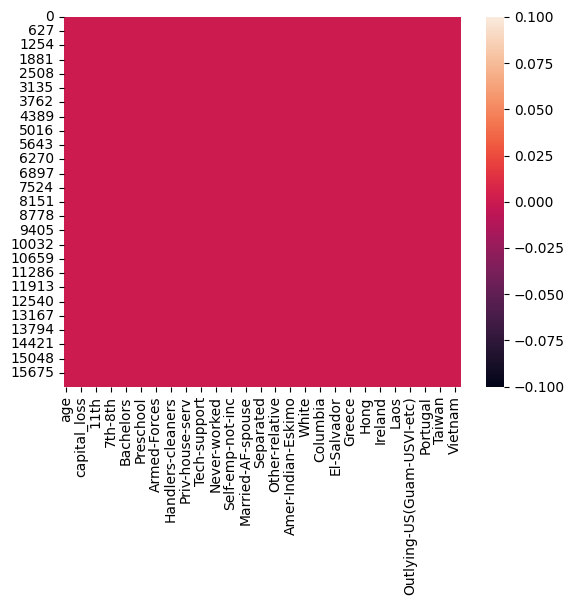

In [824]:
import seaborn as sns
sns.heatmap(test.isnull())

In [825]:
test.isnull().sum()

age                0
education_num      0
sex                0
capital_gain       0
capital_loss       0
                  ..
Thailand           0
Trinadad&Tobago    0
United-States      0
Vietnam            0
Yugoslavia         0
Length: 106, dtype: int64

In [826]:
x_train=modified_new_df.drop(columns=["Income"])
y_train=modified_new_df["Income"]
x_test=test.drop(columns=["Income"])
y_test=test["Income"]

In [827]:
y_train.value_counts()

Income
0    24696
1     7839
Name: count, dtype: int64

In [828]:
y_test.value_counts()

Income
0    12434
1     3846
Name: count, dtype: int64

In [834]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [835]:
classifier.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       n_jobs=-1, random_state=42, verbose=1)

In [836]:
y_predict=classifier.predict(x_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished


In [837]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.8582309582309582